# Pandas : Examples

## Reading and Writing CSV

In [ ]:
import pandas as pd

students = pd.DataFrame([
    ["Donald Duck", "Copenhagen"],
    ["Goofy", "Aarhus"],
    ["Mickey Mouse", "Aarhus"]
], columns=["Name", "City"])

students.to_csv('students.csv', index=False)  # index=True (default) adds first column with index 0..2

students = pd.read_csv('students.csv')
students

<class 'pandas.core.frame.DataFrame'>


Name        City
0   Donald Duck  Copenhagen
1         Goofy      Aarhus
2  Mickey Mouse      Aarhus

In [18]:
print(type(students))  # <class 'pandas.core.frame.DataFrame'>
print(pd.DataFrame is pd.core.frame.DataFrame)

<class 'pandas.core.frame.DataFrame'>
True


# Initialize sqlite 

In [7]:
import sqlite3

countries = [('Denmark', 5748769, 42931, 'Copenhagen'),
             ('Germany', 82800000, 357168, 'Berlin'),
             ('USA', 325719178, 9833520, 'Washington, D.C.'), 
             ('Iceland', 334252, 102775, 'Reykjavik')]

cities = [('Copenhagen', 'Denmark', 775033, 800),
          ('Aarhus', 'Denmark', 273077, 750),
          ('Berlin', 'Germany', 3711930, 1237),
          ('Munich', 'Germany', 1464301, 1158),
          ('Reykjavik', 'Iceland', 126100, 874),
          ('Washington, D.C.', 'USA', 693972, 1790),
          ('New Orleans', 'USA', 343829, 1718),
          ('San Francisco', 'USA', 884363, 1776)]

connection = sqlite3.connect('example.sqlite')
c = connection.cursor()
c.executescript('''DROP TABLE IF EXISTS country;  -- multiple statements
                   DROP TABLE IF EXISTS city''')
c.execute('CREATE TABLE country (name, population, area, capital)')
c.executemany('INSERT INTO country VALUES (?,?,?,?)', countries)
c.execute('CREATE TABLE city (name, country, population, established)')
c.executemany('INSERT INTO city VALUES (?,?,?,?)', cities)

connection.commit()
connection.close()

## Loading Pandas data frames from sqlite3

In [14]:
import pandas as pd
import sqlite3

connection = sqlite3.connect('example.sqlite')

countries = pd.read_sql_query('SELECT * FROM country', connection)
cities = pd.read_sql_query('SELECT * FROM city', connection)

students.to_sql('students', connection, if_exists='replace')
students.to_excel('students.xlsx', sheet_name='students')

In [ ]:
type(countries), type(cities), type(students)  # Pandas data frame

In [ ]:
countries  # looks nice, because of Jupyter notebook integration

In [ ]:
print(countries)  # does not exploit Jupyter notebook integration

In [ ]:
cities

## Indexing data frames

In [ ]:
countries['name']  # single column

In [ ]:
countries.name  # can also access columns by .name

In [ ]:
countries[['name', 'capital']]  # select multiple columns

In [ ]:
countries.head(2)  # first two rows

In [ ]:
countries.tail(1)  # not a row but a data frame with one row
                   # notice row label is unchanged

In [ ]:
countries[1:3]  # row slicing by row lables

In [ ]:
countries[::2]  # every 2nd row

In [ ]:
countries.at[2, 'capital']  # use .at to lookup single cell

In [ ]:
cities['name'] == 'Berlin'

In [ ]:
cities[(cities['name'] == 'Berlin') | (cities['name'] == 'Munich')]

In [ ]:
cities.loc[1]  # single row is accessed using .loc[row lable]

In [ ]:
cities.loc[1]['name']  # another way to get a single value

In [ ]:
cities.loc[1, 'name']  # and yet another way

In [ ]:
cities.loc[[1,  3], ['country', 'name']]  # extract sub data frame

## Masking rows

In [ ]:
mask = cities['country'] == 'Denmark'
mask

In [ ]:
print(f'{type(cities) = }')
print(f'{type(mask) = }')

In [ ]:
cities[mask]  # use a boolean data frame as a mask

In [ ]:
cities[cities.country == 'Denmark']  # or shorter

In [ ]:
# can also do operations on columns +, -, &, |, ...
cities[(cities.country == 'Denmark') & (cities.established < 800)]

In [ ]:
cities.population + cities.established  # not very meaningfull but you can do it..

## Creating data frames from data

In [ ]:
pd.DataFrame([10, 11, 12, 13])  # one dimensional data

In [ ]:
pd.DataFrame({'A': [1,2,3], 'B': ['one', 'two', 'three']})  # data frame from dictionary

In [ ]:
pd.DataFrame([[10, 11], [12, 13]])  # two dimensional list

In [ ]:
pd.DataFrame([[10, 11], [12, 13]], columns=['A', 'B'])  # name columns

In [ ]:
pd.DataFrame([[10, 11], [12, 13]], 
             columns=['A', 'B'],
             index=['x', 'y'])    # can also assign row labels

In [ ]:
import numpy as np
A = np.random.random((3, 4))
A

In [ ]:
pd.DataFrame(A)

In [ ]:
R = pd.DataFrame(A, columns=list('ABCD'), index=list('yxz'))
R

# Labelled rows .loc and .iloc

In [ ]:
R.iloc[1, 2]  # .iloc can be used to index with integer numbers

In [ ]:
R.iloc[:2, :2]  # two first first rows and columns
# R[:2, :2] is invalid !!!

## Mering two data frames

In [19]:
# data frames can be merged
# note that 'name' and 'population' are in both original data frames
M = pd.merge(countries, cities, left_on='capital', right_on='name')
M  

name_x  population_x     area           capital            name_y  \
0  Denmark       5748769    42931        Copenhagen        Copenhagen   
1  Germany      82800000   357168            Berlin            Berlin   
2      USA     325719178  9833520  Washington, D.C.  Washington, D.C.   
3  Iceland        334252   102775         Reykjavik         Reykjavik   

   country  population_y  established  
0  Denmark        775033          800  
1  Germany       3711930         1237  
2      USA        693972         1790  
3  Iceland        126100          874

## Renaming, dropping and adding columns

In [ ]:
M1 = M.rename(columns={
    'population_x': 'country_population',
    'population_y': 'capital_population'
})
print(M1)
M2 = M1.drop(columns=['name_x', 'name_y'])
M2

In [ ]:
M2['empty column'] = None  # add new column to existing data frame
M2

In [ ]:
# add new column based on column computation
M2['%pop in capital'] = M2.capital_population / M2.country_population
M2

## Sorting rows

In [ ]:
# 'inplace' changes existing data frame without creating new data frame,
# otherwise a new data frame is created and returned
M2.sort_values('%pop in capital', ascending=False, inplace=True)
M2

In [ ]:
M2.loc[3:1]

## Pandas and Matplotlib integration

In [ ]:
 %matplotlib inline
    
cities.plot(kind='scatter', x='name', y='population', rot=15)  # data frames have a .plot attribute

None

## pandas_datareader and matplotlib integration

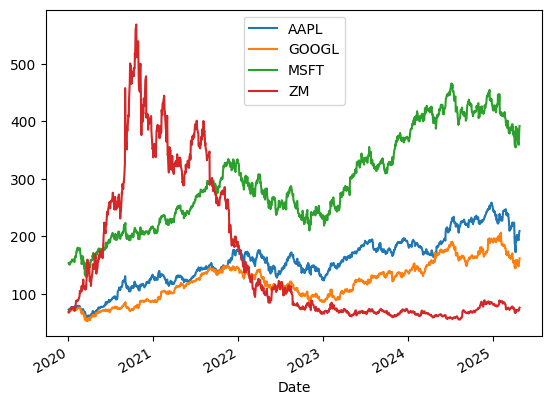

In [21]:
import matplotlib.pyplot as plt
import pandas_datareader  # module giving access to a lot of standard data sources, eg. World Bank

#df = pandas_datareader.data.DataReader(['AAPL', 'GOOGL', 'MSFT', 'ZM'], 'stooq')  # ignores start=...

stocks = pandas_datareader.stooq.StooqDailyReader(['AAPL', 'GOOGL', 'MSFT', 'ZM'], start='2020-01-01').read()
stocks['Close'].plot()
plt.legend()
None  # avoid print result of plt.legend() to terminal

## Hierarchical / Multi-level indexing (MultiIndex)

In [ ]:
countries.columns  # a standard index

In [ ]:
countries.index  # standard row labels

In [ ]:
stocks  # notice hierarchical headings

In [ ]:
stocks.Close  # one top level group of the columns

In [ ]:
stocks.Close.GOOGL  # selecting a single column

In [ ]:
stocks['Close']['GOOGL']  # same as above

In [ ]:
stocks.columns  # has a MultiIndex

In [ ]:
stocks.index

In [ ]:
# select all rows and columns with 1st level = all, 2nd level = 'GOOGLE'
stocks.loc[:, pd.IndexSlice[:,'GOOGL']]  

## Creating your own multi index

In [ ]:
column_index = pd.MultiIndex.from_tuples([('one', 'a'), ('one', 'b'),
                                          ('two', 'a'), ('two', 'b'), ('two', 'c')])

row_index = pd.MultiIndex.from_tuples((x, y) for x in 'ABC' for y in 'xy')

H = pd.DataFrame(np.arange(30).reshape(6, 5), columns=column_index, index=row_index)
H

## Reorganizing hierarcical labels - stack and unstack

In [ ]:
H

In [ ]:
H.stack(level=0)  # move one level of indexing from columns to last rows (missing columns filled with NaN)

In [ ]:
H.stack(level=1)

In [ ]:
H.unstack(level=0)  # and unstack moves row level to column last level

## And there are much more ... see the Pandas documentation